In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
df_airlinewise = pd.read_csv("Airlinewise Monthly International Air Traffic To And From The Indian Territory.csv")
df_citywise = pd.read_csv("Citypairwise Quarterly International  Air Traffic To And From The Indian Territory.csv", error_bad_lines=False, comment='#')
df_countrywise = pd.read_csv("Countrywise Quarterly International Air Traffic To And From The Indian Territory.csv")

b'Skipping line 1850: expected 9 fields, saw 10\nSkipping line 1851: expected 9 fields, saw 10\nSkipping line 1852: expected 9 fields, saw 10\nSkipping line 1853: expected 9 fields, saw 10\nSkipping line 1854: expected 9 fields, saw 10\nSkipping line 1855: expected 9 fields, saw 10\nSkipping line 1856: expected 9 fields, saw 10\nSkipping line 1857: expected 9 fields, saw 10\nSkipping line 1858: expected 9 fields, saw 10\nSkipping line 1859: expected 9 fields, saw 10\nSkipping line 1860: expected 9 fields, saw 10\nSkipping line 1861: expected 9 fields, saw 10\nSkipping line 1862: expected 9 fields, saw 10\nSkipping line 1863: expected 9 fields, saw 10\nSkipping line 1864: expected 9 fields, saw 10\nSkipping line 1865: expected 9 fields, saw 10\nSkipping line 1866: expected 9 fields, saw 10\nSkipping line 1867: expected 9 fields, saw 10\nSkipping line 1868: expected 9 fields, saw 10\nSkipping line 1869: expected 9 fields, saw 10\nSkipping line 1870: expected 9 fields, saw 10\nSkipping li

In [172]:
df_airlinewise.sample(20)

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
1823,2016,OCT,Q4,KENYA AIRWAYS,FOREIGN,6152.0,5030,8.900,7.600
180,2015,MAR,Q1,AIR ASTANA,FOREIGN,1995.0,2681,5.141,31.392
425,2015,JUN,Q2,ALL NIPPON AIRWAYS,FOREIGN,651.0,5900,351.637,393.629
908,2015,DEC,Q4,AEROLOGIC,FOREIGN,0.0,0,1.975,1.575
584,2015,AUG,Q3,AIR MAURITIUS,FOREIGN,5185.0,6114,9.904,211.413
2304,2017,MAR,Q1,OMAN AIR,FOREIGN,76449.0,81312,119.100,1432.500
1820,2016,OCT,Q4,JAPAN AIRLINES,FOREIGN,3546.0,3519,373.500,108.100
1144,2016,FEB,Q1,SWISS AIR,FOREIGN,10461.0,11690,784.700,524.000
1082,2016,FEB,Q1,AIR ASIA BERHAD,FOREIGN,30677.0,31080,58.400,230.600
2043,2016,DEC,Q4,UNITED AIRLINES,FOREIGN,14512.0,14517,215.300,272.900


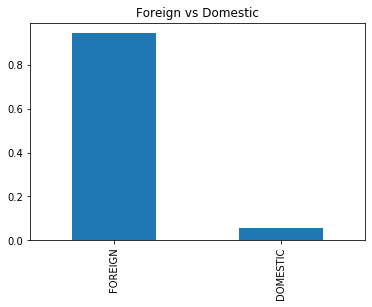

In [28]:
status_vals = df_airlinewise['CARRIER TYPE'].value_counts()
(status_vals/df_airlinewise.shape[0]).plot(kind="bar");
plt.title("Foreign vs Domestic");

In [159]:
month_set = set()
for i in range(len(df_airlinewise)):
    month_set.add(df_airlinewise.loc[i, "MONTH"])

In [175]:
passenger_in_month= {}
sum = 0
for i in month_set:
    df_airlinewise2 = df_airlinewise.loc[df_airlinewise["YEAR"]== 2015, ["MONTH", "PASSENGERS FROM INDIA", "PASSENGERS TO INDIA"]]
    df_airlinewise2 = df_airlinewise2.loc[df_airlinewise["MONTH"]== i, ["PASSENGERS FROM INDIA", "PASSENGERS TO INDIA"]]
    df_airlinewise2["PASSENGERS"] = df_airlinewise2["PASSENGERS TO INDIA"] + df_airlinewise2["PASSENGERS FROM INDIA"]
    passenger_in_month[i] = np.sum(df_airlinewise2["PASSENGERS"])

df_airlinewise2 = pd.DataFrame(passenger_in_month.items(), columns = ["MONTH", "Number of Passengers"])
df_airlinewise2 = df_airlinewise2.sort_values("Number of Passengers", ascending = False)
print(df_airlinewise2)

   MONTH  Number of Passengers
7    DEC             4528867.0
4    JAN             4315723.0
1    MAY             4266411.0
6    AUG             4076385.0
8    OCT             4054073.0
5    NOV             4040133.0
3    MAR             4026224.0
10   JUL             3971642.0
2    JUN             3969443.0
0    APR             3917489.0
9    FEB             3746648.0
11   SEP             3727558.0


Text(0, 0.5, 'Number of international passengers')

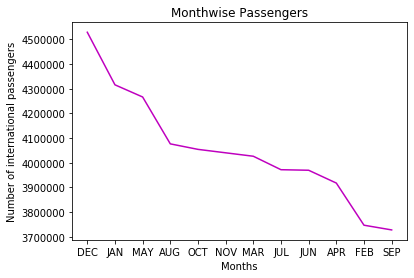

In [176]:
plt.plot(df_airlinewise2["MONTH"], df_airlinewise2["Number of Passengers"], color= 'm')
plt.title("Monthwise Passengers")
plt.xlabel("Months")
plt.ylabel("Number of international passengers")

In [173]:
passenger_in_month= {}
sum = 0
for i in month_set:
    df_airlinewise2 = df_airlinewise.loc[df_airlinewise["YEAR"]== 2016, ["MONTH", "PASSENGERS FROM INDIA", "PASSENGERS TO INDIA"]]
    df_airlinewise2 = df_airlinewise2.loc[df_airlinewise["MONTH"]== i, ["PASSENGERS FROM INDIA", "PASSENGERS TO INDIA"]]
    df_airlinewise2["PASSENGERS"] = df_airlinewise2["PASSENGERS TO INDIA"] + df_airlinewise2["PASSENGERS FROM INDIA"]
    passenger_in_month[i] = np.sum(df_airlinewise2["PASSENGERS"])

df_airlinewise2 = pd.DataFrame(passenger_in_month.items(), columns = ["MONTH", "Number of Passengers"])
df_airlinewise2 = df_airlinewise2.sort_values("Number of Passengers", ascending = False)
print(df_airlinewise2)

   MONTH  Number of Passengers
7    DEC             5021776.0
4    JAN             4685320.0
1    MAY             4644549.0
10   JUL             4556844.0
5    NOV             4512705.0
6    AUG             4491752.0
3    MAR             4432430.0
0    APR             4334523.0
2    JUN             4317921.0
8    OCT             4294796.0
11   SEP             4269781.0
9    FEB             4097068.0


Text(0, 0.5, 'Number of international passengers')

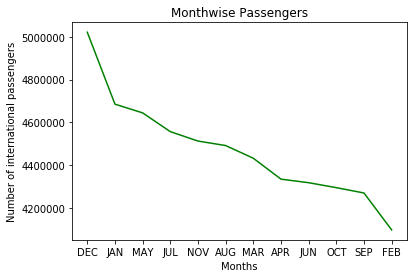

In [174]:
plt.plot(df_airlinewise2["MONTH"], df_airlinewise2["Number of Passengers"], color= 'g')
plt.title("Monthwise Passengers")
plt.xlabel("Months")
plt.ylabel("Number of international passengers")

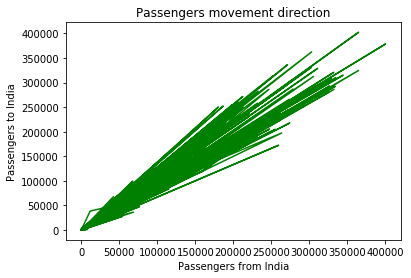

In [53]:
plt.plot(df_airlinewise['PASSENGERS FROM INDIA'], df_airlinewise['PASSENGERS TO INDIA'], color = "green")
# naming the x axis 
plt.xlabel('Passengers from India') 
# naming the y axis 
plt.ylabel('Passengers to India') 
  
# giving a title to my graph 
plt.title('Passengers movement direction') 
  
# function to show the plot 
plt.show() 

In [58]:
df_countrywise.head()

,YEAR,QUARTER,COUNTRY NAME,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
0,2015,Q1,AFGHANISTAN,37194,32721,96.7,676.4
1,2015,Q1,AUSTRALIA,16676,19075,89.7,423.7
2,2015,Q1,AUSTRIA,13318,15529,563.8,707.0
3,2015,Q1,BAHRAIN,114087,133527,585.7,1909.5
4,2015,Q1,BANGLADESH,76357,75673,624.1,1052.9


In [79]:
df_countrywise2 = df_countrywise.loc[df_countrywise["COUNTRY NAME"]== "AUSTRALIA", ["PASSENGERS FROM INDIA", "PASSENGERS TO INDIA"]]
df_countrywise2["PASSENGERS"] = df_countrywise2["PASSENGERS TO INDIA"] + df_countrywise2["PASSENGERS FROM INDIA"]
np.sum(df_countrywise2["PASSENGERS"])

323166

In [84]:
country_set = set()
for i in range(len(df_countrywise)):
    country_set.add(df_countrywise.loc[i, "COUNTRY NAME"])

{'BURMA', 'YEMEN', 'BHUTAN', 'JORDAN', 'JAPAN', 'KAZAKHSTAN', 'IRAQ', 'ITALY', 'EGYPT', 'NEPAL', 'RUSSIA', 'TURKEY', 'UNITED KINGDOM', 'BAHRAIN', 'KUWAIT', 'SINGAPORE', 'AZERBAIJAN', 'KYRGYZSTAN', 'HONG KONG', 'UNITED STATES', 'TURKMENISTAN', 'ISRAEL', 'SOUTH AFRICA', 'UNITED ARAB EMIRATES*', 'UNITED ARAB EMIRATES', 'VIETNAM', 'AFGHANISTAN', 'IRAN', 'FRANCE', 'AUSTRALIA', 'UZBEKISTAN', 'SPAIN', 'GEORGIA', 'QATAR', 'SEYCHELLES', 'MALDIVES', 'CANADA', 'BANGLADESH', 'SWITZERLAND', 'SAUDI ARABIA', 'TAJIKISTAN', 'OMAN', 'ETHIOPIA', 'REUNION', 'KOREA', 'NETHERLANDS', 'THAILAND', 'TAIWAN', 'SRI LANKA', 'INDONESIA', 'MAURITIUS', 'GERMANY', 'FINLAND', 'KENYA', 'PAKISTAN', 'BELGIUM', 'CHINA', 'MALAYSIA', 'AUSTRIA'}


In [120]:
passenger_country= {}
sum = 0
for i in country_set:
    df_countrywise2 = df_countrywise.loc[df_countrywise["COUNTRY NAME"]== i, ["PASSENGERS FROM INDIA", "PASSENGERS TO INDIA"]]
    df_countrywise2["PASSENGERS"] = df_countrywise2["PASSENGERS TO INDIA"] + df_countrywise2["PASSENGERS FROM INDIA"]
    passenger_country[i] = np.sum(df_countrywise2["PASSENGERS"])

df_countrywise2 = pd.DataFrame(passenger_country.items(), columns = ["Country", "Number of Passengers"])
df_countrywise2 = df_countrywise2.sort_values("Number of Passengers", ascending = False)

                  Country  Number of Passengers
23  UNITED ARAB EMIRATES*              30444114
24   UNITED ARAB EMIRATES               8654675
15              SINGAPORE               7814358
39           SAUDI ARABIA               7153859
33                  QATAR               6322916
46               THAILAND               6180607
41                   OMAN               6104693
12         UNITED KINGDOM               5654134
57               MALAYSIA               4809196
48              SRI LANKA               4473928
18              HONG KONG               3168560
51                GERMANY               2914314
13                BAHRAIN               2382658
14                 KUWAIT               2210700
19          UNITED STATES               2041033
9                   NEPAL               1819218
28                 FRANCE               1590012
37             BANGLADESH               1533982
56                  CHINA               1311229
11                 TURKEY               

In [125]:
df_countrywise2 = df_countrywise2.iloc[:9]

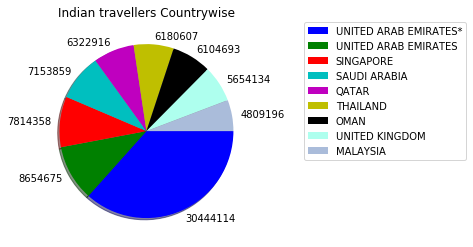

In [151]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#aeffee','#aabcda']
explode = (0.2, 0, 0, 0, 0, 0)
plt.pie(df_countrywise2['Number of Passengers'], colors=colors, labels=df_countrywise2['Number of Passengers'],counterclock=False, shadow=True)
plt.title('Indian travellers Countrywise')
plt.legend(df_countrywise2['Country'], loc = "upper left", bbox_to_anchor=(1.2,1.025))
plt.show()